# Diffusion Maps

## What is diffusion maps?

### Idea

Diffusion maps is a non-linear dimensionality reduction technique. It begins with the assumption that the data lies near some submanifold of feature space. The algorithm then tries to learn a low-dimensional embedding of the data by learning distances between points within the underlying manifold via a diffusion process. Two points are near each other in the manifold if there are a large number of ways to reach one point from the other via short, high-probability jumps between points, as opposed to long-distance jumps in the underlying feature space.

Diffusion maps has the following nice features:
* It is topology-preserving.
* It is geometry-preserving, in an appropriate sense.
* It is computationally inexpensive compared to similar algorithms.
* It is robust against noise.

### Algorithm

Given a data set $X$ with observations arranged in columns and one row per feature:
1. Select a symmetric, positive semidefinite kernel function $k(x,y)$. A common choice is the Gaussian kernel:
$$ k(x,y) = \exp \left( - \frac{||x - y||^2}{\epsilon} \right) $$
2. Compute the kernel matrix $K$ by applying the kernel to all pairs of data vectors: $K^{ij} = k(X^{(i)}, X^{(j)})$
3. Normalize the rows of $K$ via
4. Compute the eigendecomposition of the normalized kernel matrix:
5. Retain the dominant $k$ eigenvectors to compute the low-dimensional embedding:

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go

In [2]:
# Temporarily add the project folder the system path to enable importing the src folder
import sys
sys.path.append("../")
from src.diffusion_maps import *
from src.data import *
from src.plotting import *

## Generate and visualize a data set

In [4]:
X = generate_toy_ellipse(n_points=300, noisiness=1/40, r1=1)

In [18]:
X = generate_broken_ellipse(n_points=300, noisiness=1/50, r1=1)

In [9]:
X, color = generate_toroidal_helix(n_points=600, noisiness=1/40, R=2, r=1, n=10)

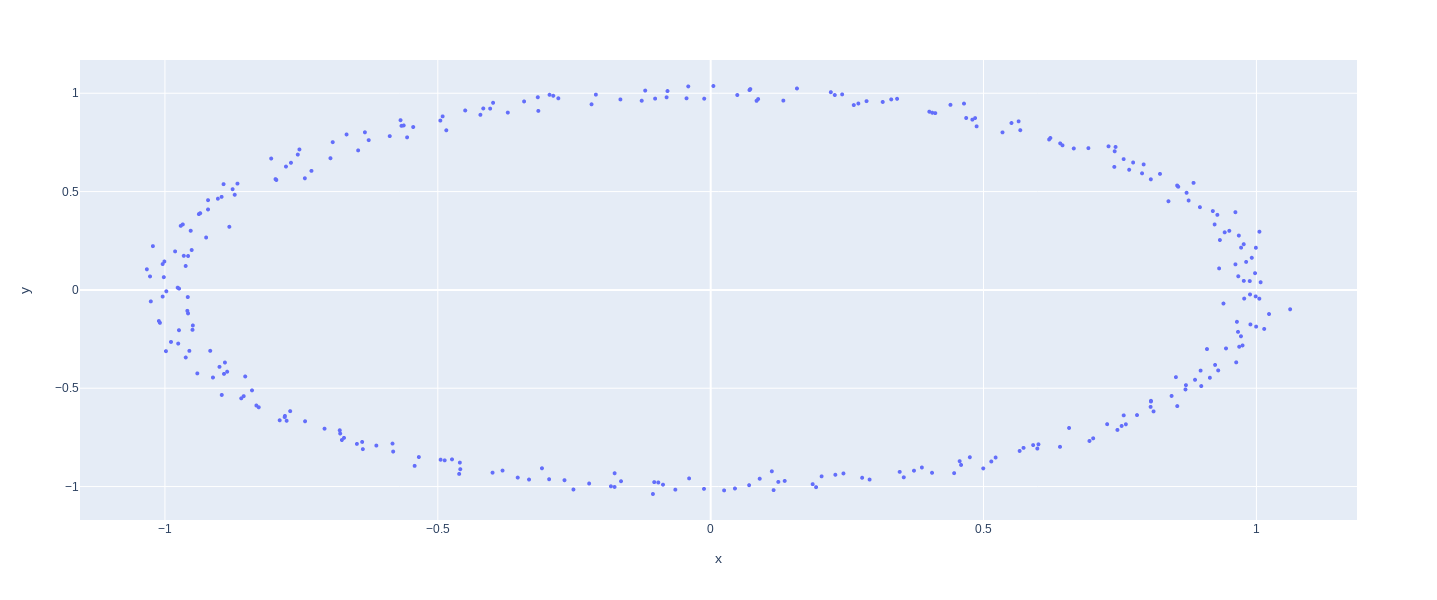

In [8]:
visualize_2d_data(X.T, marker_size=4)

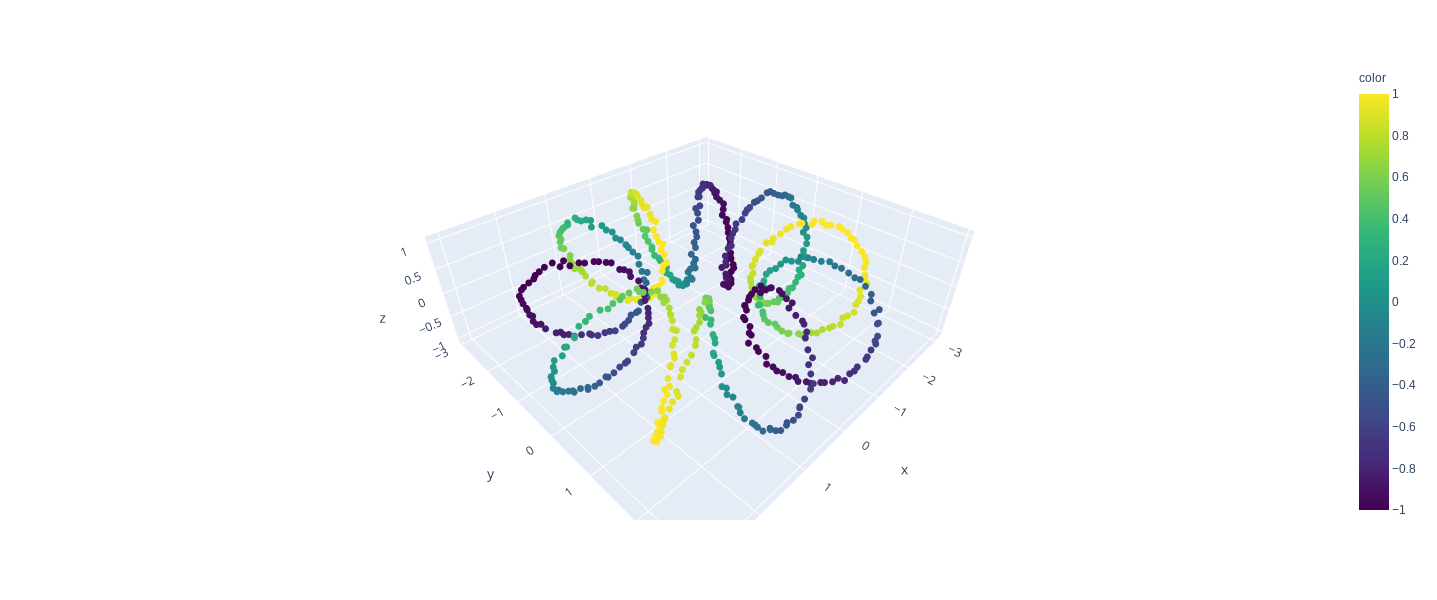

In [10]:
visualize_3d_data(X.T, color, marker_size=4)

## Compute the diffusion matrix and low-dimensional embedding

In [29]:
D = diffusion_maps(X, rbf_kernel(epsilon=1), alpha=1, t=1)

In [30]:
E = diffusion_embedding(D, k=4)

## Visualize eigenvectors of the diffusion matrix

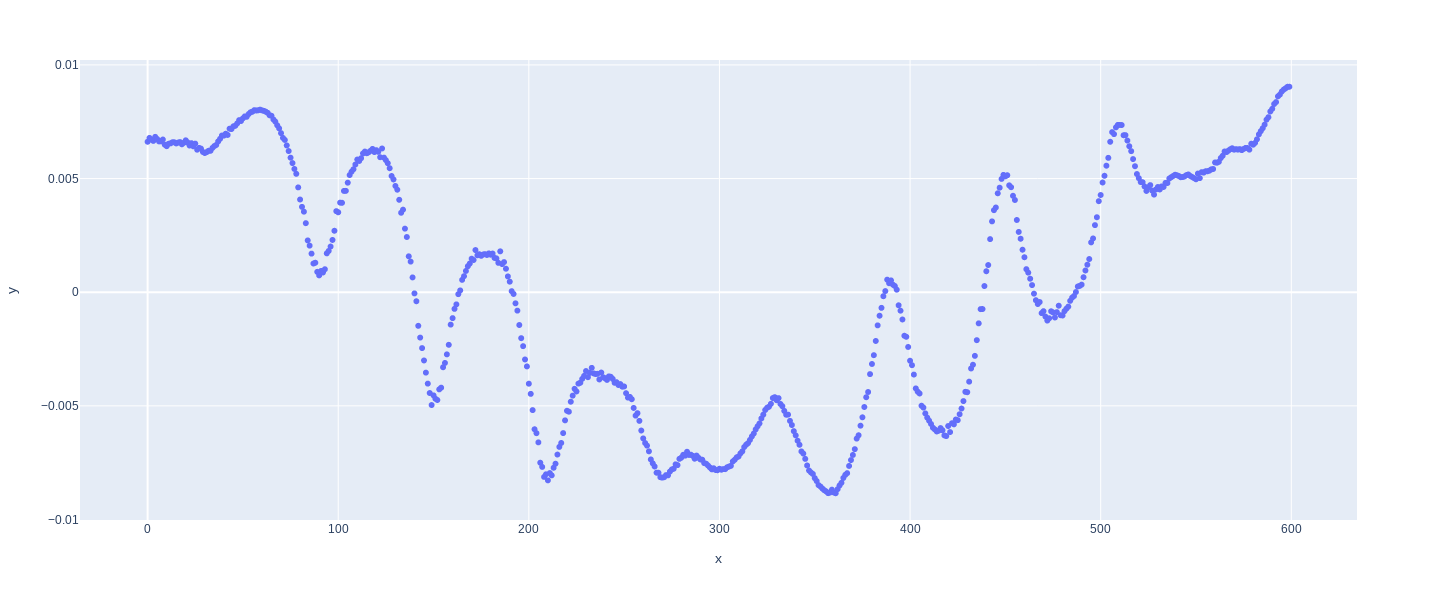

In [26]:
display_eigenvector(E, 2)

## Plot the low-dimensional diffusion map embedding

In [31]:
emb = E[:,1:3]

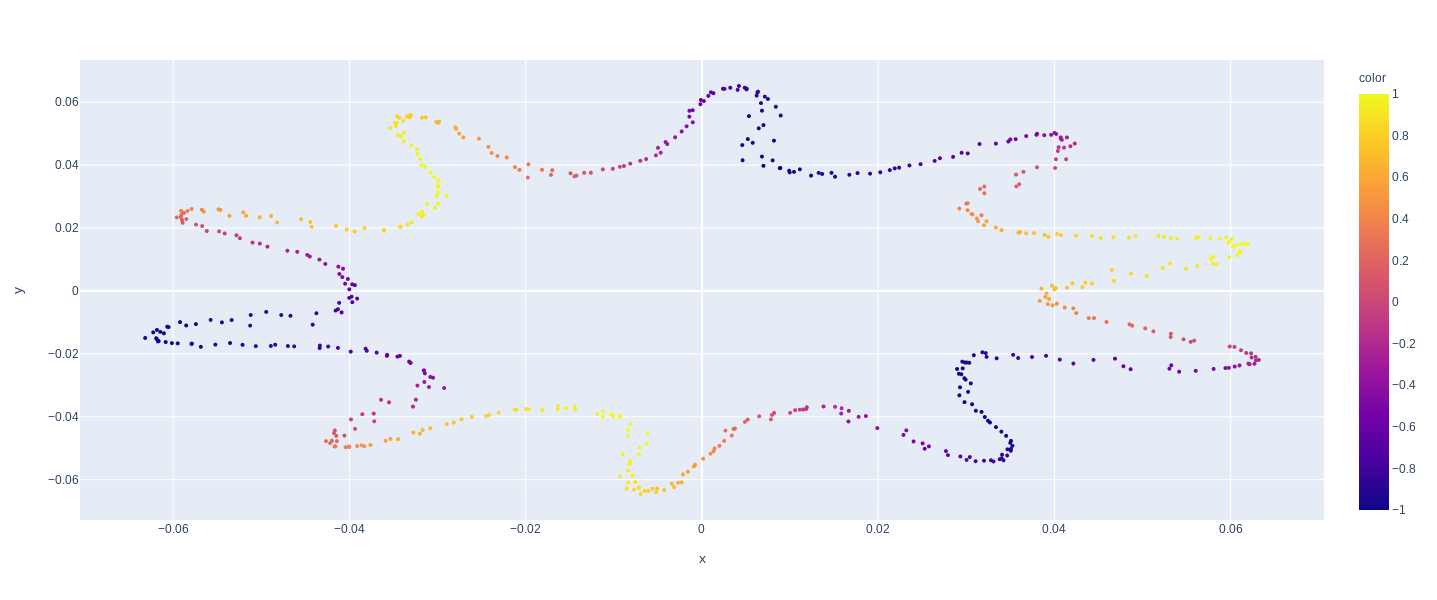

In [32]:
visualize_2d_data(emb, color)

We need to generate the matrix of pairwise similarities of our data vectors given some kernel function.

## The transformer class

In [ ]:
class DiffusionMaps(BaseEstimator, TransformerMixin):
    def __init__(data, kernel = rbf_kernel):
        self.kernel = kernel
        self.data = data
        
    def fit(X, y = None):
        return self
    
    def transform(X):
        return self